In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import arviz as az

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [3]:
(12 + 44 + 21 + 62 + 24) / 5

32.6

In [4]:
x = np.array([12, 44, 21, 62, 24])
np.mean(x)

32.6

In [5]:
np.average(x)

32.6

In [6]:
zero_one = np.array([1, 1, 1, 0])
result = sum(zero_one)
print(result) 

3


In [7]:
np.mean(zero_one)

0.75

In [8]:
np.mean(np.array([(True, True, True, False)]))

0.75

In [9]:
df = pd.read_csv("../data/STAR.csv")
df.head()

,classtype,reading,math,graduated
0,small,578,610,1
1,regular,612,612,1
2,regular,583,606,1
3,small,661,648,1
4,small,614,636,1


In [10]:
df.groupby("graduated").size()

graduated
0     166
1    1108
dtype: int64

In [11]:
df.groupby("graduated")["math"].mean().round(2)

graduated
0    606.64
1    635.33
Name: math, dtype: float64

In [12]:
df.groupby("graduated")["math"].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
graduated,,,,,,,,
0,166.0,606.6,34.1,526.0,580.5,606.0,629.0,711.0
1,1108.0,635.3,38.1,515.0,609.5,634.0,659.0,774.0


In [13]:
not_graduated = df[df["graduated"] == 0].math
stats.trim_mean(not_graduated, 0.10)

605.6492537313433

In [14]:
graduated = df[df["graduated"] == 1].math
stats.trim_mean(graduated, 0.10)

634.4403153153153

In [15]:
# Quantili di ordine 0.1 e 0.9 per il gruppo di studenti che hanno completato la scuola superiore
[
    df[df["graduated"] == 1]["math"].quantile(0.1), 
    df[df["graduated"] == 1]["math"].quantile(0.9)
]

[588.0, 684.0]

In [16]:
# Quantili di ordine 0.1 e 0.9 per il gruppo di studenti che non hanno completato la scuola superiore
[
    df[df["graduated"] == 0]["math"].quantile(0.1),
    df[df["graduated"] == 0]["math"].quantile(0.9),
]

[564.5, 651.0]

In [17]:
sum((df["math"] - np.mean(df["math"])) ** 2) / len(df["math"])

1507.2328523125227

In [18]:
np.var(df["math"])

1507.2328523125225

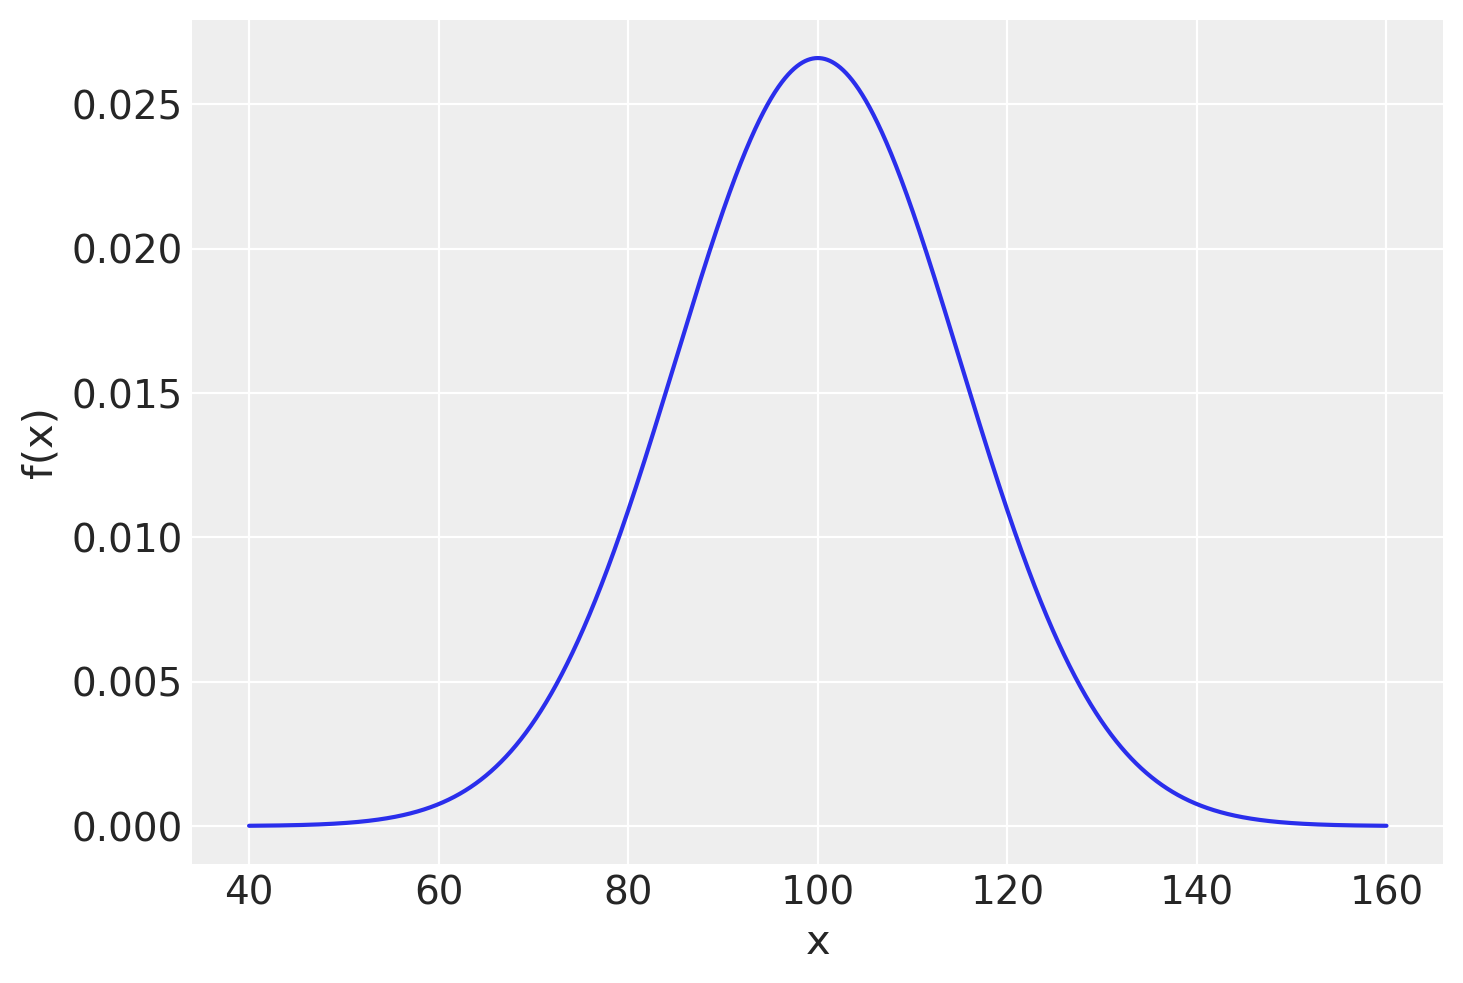

In [19]:
x = np.arange(100 - 4 * 15, 100 + 4 * 15, 0.001)

mu = 100
sigma = 15

pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [20]:
x = rng.normal(loc=100, scale=15, size=4)
print(x)

[104.5707562   84.40023841 111.25676794 114.10847075]


In [21]:
np.var(x)

134.65656223872708

In [22]:
mu = 100
sigma = 15
size = 4
niter = 10
random_samples = []

for i in range(niter):
    one_sample = rng.normal(loc=mu, scale=sigma, size=size)
    random_samples.append(one_sample)

In [23]:
random_samples[0]

array([ 70.73447217,  80.4673074 , 101.91760605,  95.25636111])

In [24]:
random_samples[9]

array([111.14881257, 108.14731402,  90.01735439, 103.48241985])

In [25]:
rs = np.array(random_samples)
rs

array([[ 70.73447217,  80.4673074 , 101.91760605,  95.25636111],
       [ 99.74798264,  87.20434109, 113.19096962, 111.66687903],
       [100.99046046, 116.9086181 , 107.01264013,  87.11061306],
       [105.53126176,  85.61676099, 113.17675452,  99.25111134],
       [ 97.22706455,  89.78605683, 118.33812008,  97.68205777],
       [ 93.57508267,  94.71799674, 107.98463778, 105.48166097],
       [106.19098917, 106.46231505, 132.12471401,  93.90377475],
       [ 92.31635906,  87.79340908, 109.23969134, 116.93458439],
       [ 98.29078814,  87.39765285,  87.63278176, 109.75889182],
       [111.14881257, 108.14731402,  90.01735439, 103.48241985]])

In [26]:
x_var = np.var(rs, axis=1)  # applichiamo la funzione su ciascuna riga
print(x_var)

[149.47766022 109.7600257  116.51542008 102.11584256 112.84327106
  40.55207893 193.79519955 142.57973567  84.58849615  65.38035983]


In [27]:
mu = 100
sigma = 15
size = 4
niter = 10000
random_samples = []

for i in range(niter):
    one_sample = rng.normal(loc=mu, scale=sigma, size=size)
    random_samples.append(one_sample)

rs = np.array(random_samples)
x_var = np.var(rs, ddof=0, axis=1)

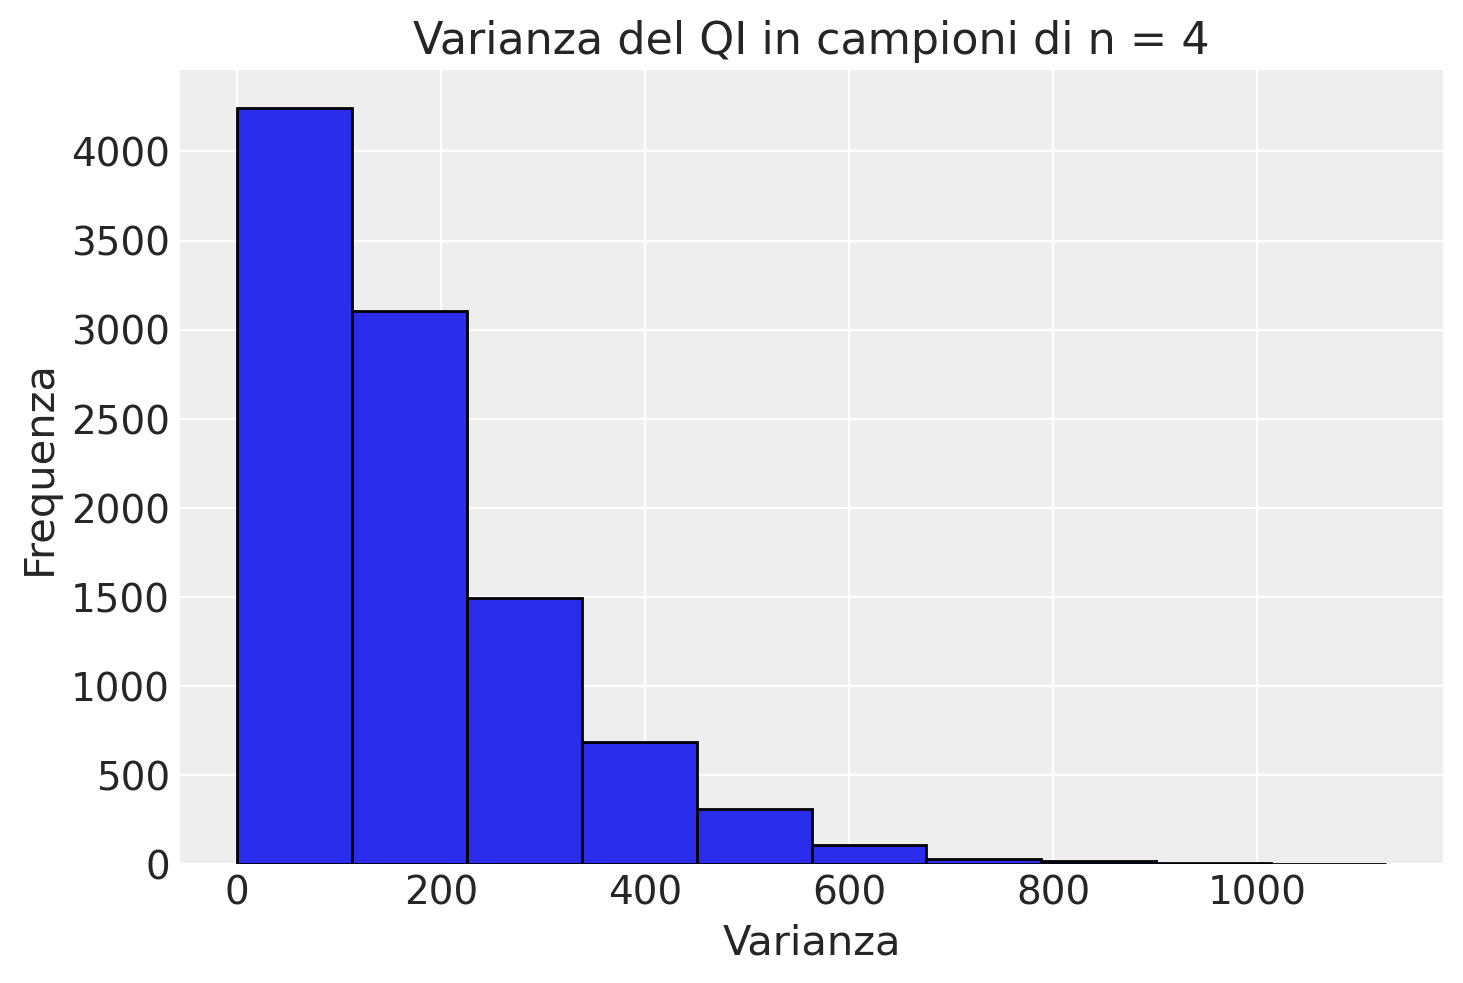

In [28]:
plt.hist(x_var, bins=10, edgecolor="black")
plt.xlabel("Varianza")
plt.ylabel("Frequenza")
plt.title("Varianza del QI in campioni di n = 4")
plt.show()

In [29]:
np.mean(x_var)

170.0061889450475

In [30]:
mu = 100
sigma = 15
size = 4
niter = 10000
random_samples = []

for i in range(niter):
    one_sample = rng.normal(loc=mu, scale=sigma, size=size)
    random_samples.append(one_sample)

rs = np.array(random_samples)
x_var = np.var(rs, ddof=1, axis=1)

np.mean(x_var)

225.39234792173943

In [31]:
np.std(df.math)

38.82309689234648

In [32]:
df.groupby("graduated")["math"].std()

graduated
0    34.105746
1    38.130136
Name: math, dtype: float64

In [33]:
np.std(df["math"])

38.82309689234648

In [34]:
np.mean(np.abs(df.math - np.mean(df.math)))

30.9682664274501

In [35]:
1.4826 * np.median(np.abs(df["math"] - np.median(df["math"])))

41.5128

In [36]:
np.std(df["math"])

38.82309689234648

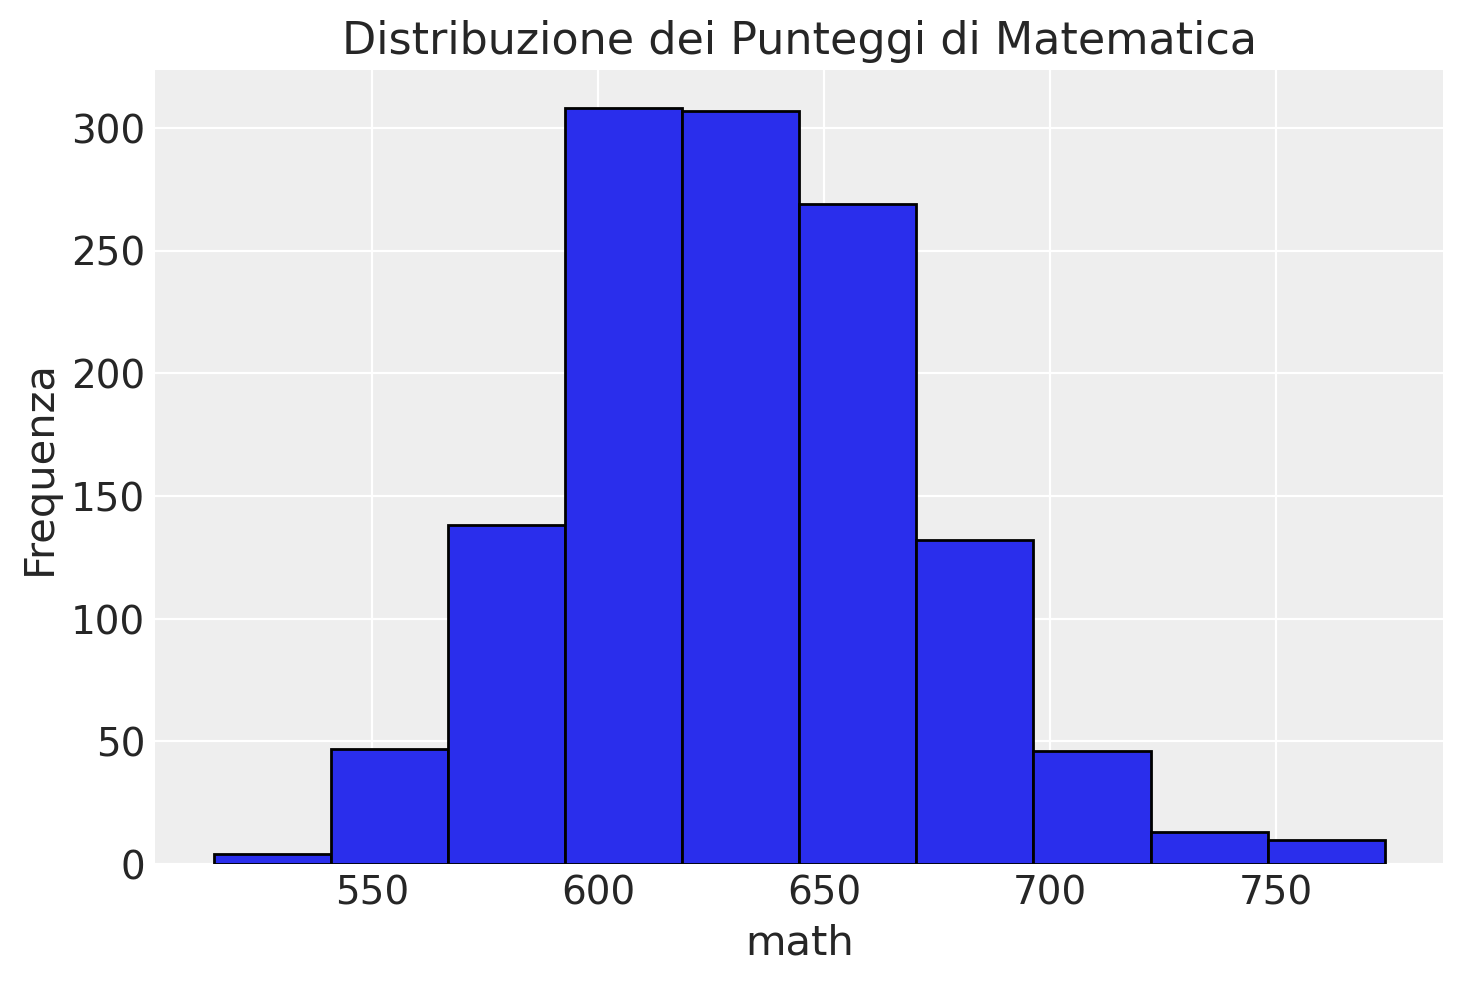

In [37]:
plt.hist(df["math"], bins=10, edgecolor="black")
plt.xlabel("math")
plt.ylabel("Frequenza")
plt.title("Distribuzione dei Punteggi di Matematica")
plt.show()

In [38]:
x = np.random.normal(loc=100, scale=15, size=10000)
1.4826 * np.median(np.abs(x - np.median(x)))

14.939892335455665

In [39]:
%load_ext watermark
%watermark -n -u -v -iv -w 

Last updated: Mon Nov 13 2023

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.16.1

numpy     : 1.25.2
arviz     : 0.16.1
scipy     : 1.11.3
matplotlib: 3.8.0
seaborn   : 0.13.0
pandas    : 2.1.1

Watermark: 2.4.3

